In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

print(cv2.__version__)

4.5.1


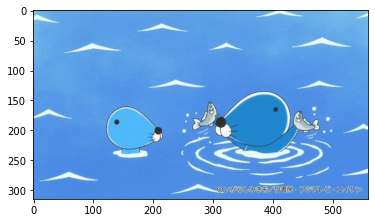

In [13]:
## 칼라 이미지 읽기, 투명한 부분은 무시 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈
plt.imshow(img)
plt.show()

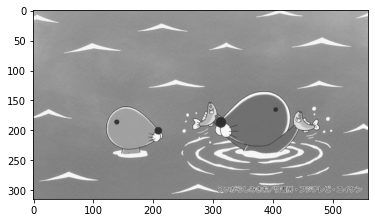

In [31]:
## 흑백 이미지 읽기 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) # BGR 형태이미지를 RGB로 바꿈
plt.imshow(img)
plt.show()

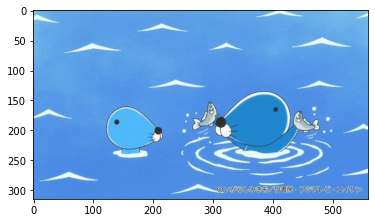

In [32]:
## 칼라 이미지 읽기, 투명한 부분도 읽음 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈
plt.imshow(img)
plt.show()

In [33]:
cv2.imwrite("new_bono.jpg", img) #이미지 저장

print(img.shape)
print(img.size)

(315, 560, 3)
529200


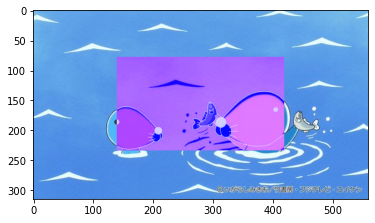

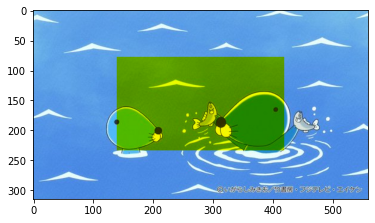

In [62]:
## 이미지 범위별로 수정 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈

# 방법 1, 느림
for row in range(img.shape[0] // 4, img.shape[0] // 4 * 3):
    for col in range(img.shape[1] // 4, img.shape[1] // 4 * 3):
        img[row][col] = [255 - img[row][col][0], 255 - img[row][col][1], 255]
        
        
plt.imshow(img)
plt.show()
        
# 방법 2, numpy 사용으로 빠름
img[img.shape[0] // 4 : img.shape[0] // 4 * 3, img.shape[1] // 4 : img.shape[1] // 4 * 3] = 255 - img[img.shape[0] // 4 : img.shape[0] // 4 * 3, img.shape[1] // 4 : img.shape[1] // 4 * 3]

plt.imshow(img)
plt.show()

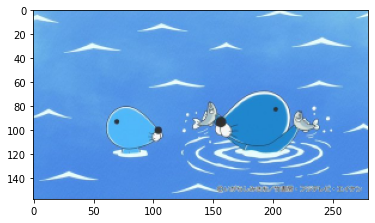

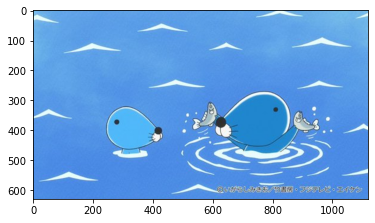

In [76]:
## 이미지 크기 수정 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈

#cv2.resize(이미지, 메뉴얼세팅, 가로비율, 세로비율, 보간법)
small_img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA) #이미지 축소

plt.imshow(small_img)
plt.show()

big_img = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC) #이미지 확대

plt.imshow(big_img)
plt.show()

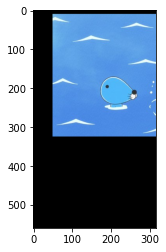

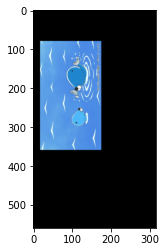

In [92]:
## 이미지 위치 변경 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈

M = np.float32([[1, 0, 50], [0, 1, 10]]) #변환행렬, 가로 50 세로 10만큼 이동
trans_img = cv2.warpAffine(img, M, (img.shape[0], img.shape[1]))

plt.imshow(trans_img)
plt.show()

#cv2.getRotationMatrix2D(회전중심, 회전각도, 스케일)
R = cv2.getRotationMatrix2D((img.shape[0] / 2, img.shape[1] / 2), 90, 0.5) #가운데를 중심으로 90도 회전후 크기를 0.5로 줄임
trans_img = cv2.warpAffine(img, R, (img.shape[0], img.shape[1]))

plt.imshow(trans_img)
plt.show()

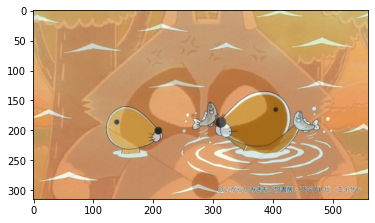

True

In [48]:
## 이미지 겹치기 ##

img = cv2.imread('bono.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈

img2 = cv2.imread('bono2.jpg')
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈

#크기를 맞춰줌
img2 = cv2.resize(img2, dsize = (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)

#혼합 비율 설정
img[:, :] = img[:, :] * 0.8
img2[:, :] = img2[:, :] * 0.2

overlap = cv2.add(img, img2) #이미지 2개를 겹침

plt.imshow(overlap)
plt.show()

In [ ]:
## 이미지 임계접 처리 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_GRAYSCALE)

_, img1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) #127을 넘는 픽셀은 255로 바꿈

plt.imshow(img1)
plt.show()